### Import

In [33]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Fonts

In [34]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load Data

In [58]:
data = pd.read_csv('../../data/iris/iris.data',header=None).values
labels = data[:,-1]
X = data[:,:-1].astype('float')
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)
classes = label_encoder.classes_
ylabel = label_encoder.transform(labels)

### Hot-one encoding

In [59]:
y = np.zeros((X.shape[0],len(classes)))
for i in range(X.shape[0]):
    y[i,ylabel[i]] = 1

### Randomization

In [60]:
randperm = np.random.permutation(X.shape[0])
X = X[randperm,:]
y = y[randperm,:]

### Divide the data into train and t

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Create Tensorflow Model

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

### Compile

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Fit

In [64]:
history = model.fit(X_train, y_train, batch_size=50, verbose=0, epochs=150, validation_data=(X_test,y_test));

### Predict

In [65]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

### Plot Loss, accuracy and confusion matrix

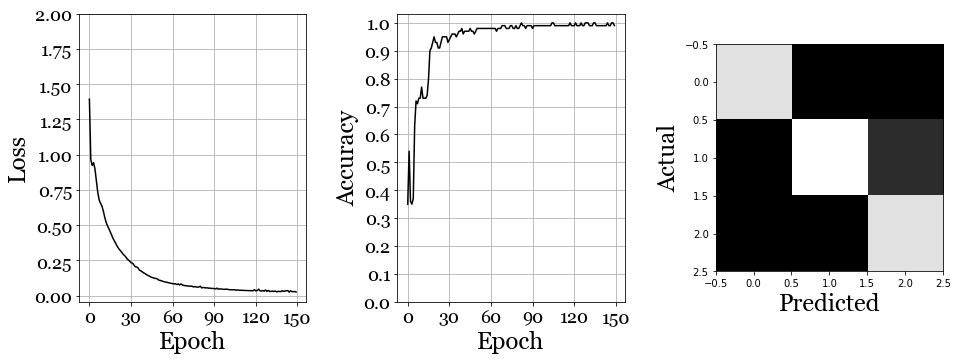

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.subplots_adjust(left=0.0,bottom=0.0, right=1.0, top=1.0, wspace=0.4, hspace=0)
plt.plot(history.history['loss'],c='k')
plt.grid();
plt.xticks(np.linspace(0,150,6),**csfont,fontsize=18);
plt.yticks(np.linspace(0,2,9),**csfont,fontsize=18);
plt.xlabel('Epoch',**csfont,fontsize=24);
plt.ylabel('Loss',**csfont,fontsize=24);

plt.subplot(1,3,2)
plt.plot(history.history['accuracy'],c='k')
plt.grid();
plt.xticks(np.linspace(0,150,6),**csfont,fontsize=18);
plt.yticks(np.linspace(0,1,11),**csfont,fontsize=18);
plt.xlabel('Epoch',**csfont,fontsize=24);
plt.ylabel('Accuracy',**csfont,fontsize=24);

plt.subplot(1,3,3)
C = confusion_matrix(y_test, y_pred)
plt.imshow(C,cmap='gray')
plt.xlabel('Predicted',**csfont,fontsize=24);
plt.ylabel('Actual',**csfont,fontsize=24);
plt.savefig('../../assets/matplotlib/26-iris-classifer.png', dpi=300,bbox_inches="tight")    